In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
x = np.array([1,2,3,4,5,6]).reshape(6,1)
y = np.array([0,0,1,0,1,1])
x.shape, y.shape

((6, 1), (6,))

In [3]:
m = LogisticRegression().fit(x,y)

In [4]:
slope = m.coef_[0][0]
b = m.intercept_[0]
slope,b

(0.28663014626267075, -0.5850076540365196)

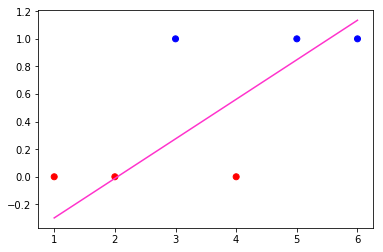

In [5]:
colors = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(x,y, c=y, cmap=colors);
fx = slope*x+b
plt.plot(x,fx, color='#ff33cc');

In [6]:
m.predict(x)

array([0, 0, 1, 1, 1, 1])

In [7]:
m.predict_log_proba(x)

array([[-0.55504603, -0.85342354],
       [-0.68729075, -0.69903811],
       [-0.84000405, -0.56512127],
       [-1.0128086 , -0.45129567],
       [-1.20456453, -0.35642145],
       [-1.41353691, -0.27876369]])

In [8]:
def sigmoid(x, fn):
    return 1 / (1+np.exp(-fn(x)))

In [9]:
for i in range(1, 7):
    p = sigmoid(i, lambda x: slope*x + b)
    print("x: {} p: {:.2f} log(p): {:.2f}".format(i, p, np.log(p)))

x: 1 p: 0.43 log(p): -0.85
x: 2 p: 0.50 log(p): -0.70
x: 3 p: 0.57 log(p): -0.57
x: 4 p: 0.64 log(p): -0.45
x: 5 p: 0.70 log(p): -0.36
x: 6 p: 0.76 log(p): -0.28


In [10]:
y

array([0, 0, 1, 0, 1, 1])

In [11]:
y_hat = m.predict_proba(x)[:,1]
y_hat

array([0.42595416, 0.49706319, 0.56829123, 0.63680253, 0.70017747,
       0.7567187 ])

In [12]:
def my_log_loss(y, y_hat):
    ll = (y*np.log(y_hat)) + ((1-y)*np.log(1-y_hat))
    return -ll.mean()

In [13]:
log_loss(y, m.predict_proba(x))

0.5759086317357319

In [14]:
my_log_loss(y, y_hat)

0.5759086317357319